# PyCaret，SHAP
分類タスク

データ：'breast_cancer_imbalance.csv'

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

from pycaret.classification import *
import pandas as pd
from pycaret.classification import *
from pycaret.utils import enable_colab
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, log_loss, confusion_matrix, precision_score, recall_score, accuracy_score

import pandas_profiling as pdp

import shap

In [2]:
enable_colab()

Colab mode enabled.


In [3]:
df = pd.read_csv('..//Data-science//data//breast_cancer_imbalance.csv')

df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       13.030         18.42           82.61      523.8          0.08983   
1        8.196         16.84           51.71      201.9          0.08600   
2       13.170         18.66           85.98      534.6          0.11580   
3       12.050         14.63           78.04      449.3          0.10310   
4       13.490         22.30           86.91      561.0          0.08752   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.03766         0.02562             0.029230         0.1467   
1           0.05943         0.01588             0.005917         0.1769   
2           0.12310         0.12260             0.073400         0.2128   
3           0.09092         0.06592             0.027490         0.1675   
4           0.07698         0.04751             0.033840         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.05863        0.1839         2.3420            1.170   
1                 0.06503        0.1563         0.9567            1.094   
2                 0.06777        0.2871         0.8937            1.897   
3                 0.06043        0.2636         0.7294            1.848   
4                 0.05718        0.2338         1.3530            1.735   

   area error  smoothness error  compactness error  concavity error  \
0      14.160          0.004352           0.004899          0.01343   
1       8.205          0.008968           0.016460          0.01588   
2      24.250          0.006532           0.023360          0.02905   
3      19.870          0.005488           0.014270          0.02322   
4      20.200          0.004455           0.013820          0.02095   

   concave points error  symmetry error  fractal dimension error  \
0              0.011640         0.02671                 0.001777   
1              0.005917         0.02574                 0.002582   
2              0.012150         0.01743                 0.003643   
3              0.005660         0.01428                 0.002422   
4              0.011840         0.01641                 0.001956   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0        13.300          22.81            84.46       545.9           0.09701   
1         8.964          21.96            57.26       242.2           0.12970   
2        15.670          27.95           102.80       759.4           0.17860   
3        13.760          20.70            89.88       582.6           0.14940   
4        15.150          31.82            99.00       698.8           0.11620   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0            0.04619          0.04833               0.05013          0.1987   
1            0.13570          0.06880               0.02564          0.3105   
2            0.41660          0.50060               0.20880          0.3900   
3            0.21560          0.30500               0.06548          0.2747   
4            0.17110          0.22820               0.12820          0.2871   

   worst fractal dimension  target  
0                  0.06169       1  
1                  0.07409       1  
2                  0.11790       0  
3                  0.08301       1  
4                  0.06917       1

In [4]:
train, test = train_test_split(df, random_state=53, stratify=df['target'])

## EDA

In [5]:
#pdp.ProfileReport(df, title='breast cancer imbalance data')

## データ入力，前処理の実行

#### setup()の実行
- 各変数の方を推定
- 推定が正しければ Enterキー，そうでなければ quit を入力
- 型の推定が誤っている変数については、setup()へ明示的に型を指定可能
- 引数 'silent = True' とすることでこのステップをスキップできる
- 'feature_selection = True' とすることで，特徴量が自動で選択される．ランダムフォレスト，AdaBoost，目的変数との線形相関といった複数のPermutation Importance の組み合わせに基づいて選択される．その際，'feature_selection_method' を'classic' か 'boruta'を指定できる．'feature_selection_threshold' を指定すること特徴量選択に使用される閾値を調整できる．値が大きいほど，選択される特徴量は多くなる．低い値に設定すると効率的ではあるが，アンダーフィットになる可能性がある．

In [6]:
clf1 = setup(
    data = train,
    session_id = 123,
    train_size = 0.7, #学習データと検証データを7:3に分割
    target = 'target',
    #numeric_imputation = 'mean', # 欠損値を平均値で補完する
    #categorical_features = [], # カテゴリ変数を指定
    #ignore_features = [], # 無視する特徴量を指定
    #feature_selection = True,
    #feature_selection_threshold=0.3, # 値が大きいほど，選択される特徴量の数が多くなる．
    #feature_selection_method='classic', # Permutation Importanvceによる選択．’boruta’とするとランダムフォレストと検定を用いた特徴量選択アルゴリズムを用いる．
    normalize = True, # 標準化の有無
    normalize_method = 'zscore', # 標準化の方法（'zscore'，'minmax'，'maxabs'，'robust'）
    #pca=True, # 主成分分析による次元削除
    #pca_method='linear', # 次元削除の方法（'linear'，'kernel'）
    #profile=True, # pandas-progiling によるEDA
    #log_data=True, # 学習データと検証データのCSVへの出力
    silent = True # 型推定の確認をスキップ
    ) 

In [7]:
get_config('transform_target_param')

False

In [8]:
# 複数のモデルの実行，比較
compare_models()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
X = get_config('X') #全ての説明変数
X

mean radius  mean texture  mean area  mean smoothness  mean compactness  \
361    -0.536526      0.410351  -0.524789        -0.604614         -1.090708   
172     0.012057     -1.325174  -0.065694        -0.395315         -0.187717   
145    -0.053773      0.026171  -0.125456        -0.691884         -1.141031   
133     0.052286     -0.562188  -0.033637         0.071357         -0.629378   
120     0.333892     -0.726068   0.216095         0.069878         -0.524391   
..           ...           ...        ...              ...               ...   
56      0.867845     -0.513829   0.608700         1.605972          2.397880   
215     0.209546      0.877814   0.100530        -0.552104         -0.590040   
288    -0.788874      0.004679  -0.711593        -0.877517         -1.078192   
41     -0.818131      0.265277  -0.730590         0.488476         -0.026787   
247     0.085201     -0.003380   0.017814        -1.462520         -0.200233   

     mean concavity  mean concave points  mean symmetry  \
361       -0.899482            -0.969682      -0.459795   
172       -0.294040            -0.248121      -0.597443   
145       -0.954249            -1.069453      -0.230383   
133       -0.319998            -0.587855       0.966388   
120       -0.182525             0.182645      -0.153912   
..              ...                  ...            ...   
56         0.957385             1.931563       0.931976   
215       -0.414948            -0.293273       0.220796   
288       -0.645662            -0.771376       2.350513   
41        -0.474547            -0.738604       1.757862   
247       -0.293186            -0.490268       0.446385   

     mean fractal dimension  radius error  ...  worst radius  worst texture  \
361                0.100347     -1.026352  ...     -0.636841       0.431759   
172               -0.188430      0.076068  ...      0.013863      -1.486725   
145               -0.593856     -0.237270  ...     -0.184803      -0.209011   
133               -0.716195     -0.451900  ...     -0.069635      -0.101897   
120               -0.871252      0.062869  ...      0.203892      -0.979848   
..                      ...           ...  ...           ...            ...   
56                 0.276743      0.675197  ...      0.566674      -1.117565   
215               -0.820040     -0.293510  ...      0.016742       0.961590   
288               -0.717617     -0.754334  ...     -0.921884      -0.165018   
41                 0.296659      0.239623  ...     -0.749131      -0.165018   
247               -0.531263     -0.445014  ...     -0.003412       0.083639   

     worst perimeter  worst area  worst smoothness  worst compactness  \
361        -0.672938   -0.564785         -0.787501          -1.178259   
172        -0.013391   -0.074703         -0.356716           0.215253   
145        -0.286307   -0.221272         -1.138139          -1.284930   
133        -0.130054   -0.131777         -0.046151          -0.172993   
120         0.073791    0.098393          0.064050          -0.674801   
..               ...         ...               ...                ...   
56          0.570347    0.310610          0.605035           0.870418   
215         0.024514   -0.068272         -0.627209          -0.309850   
288        -0.969019   -0.751279         -1.431674          -1.292889   
41         -0.763910   -0.653477         -0.231488          -0.485531   
247         0.166447   -0.066397         -1.664598           0.322020   

     worst concavity  worst concave points  worst symmetry  \
361        -1.054643             -1.160646       -0.426668   
172        -0.100028             -0.019318       -0.411819   
145        -1.179039             -1.560551       -0.536970   
133         0.040422             -0.557557        1.794238   
120        -0.248665              0.146593       -0.483940   
..               ...                   ...             ...   
56          0.020267              1.171108       -0.356667   
215        -0

In [10]:
y = get_config('y') # 全ての目的変数
y

361    1
172    1
145    1
133    1
120    1
      ..
56     1
215    1
288    1
41     1
247    1
Name: target, Length: 300, dtype: int64

In [11]:
#X_train = get_config('X_train') # 分割後の学習用説明変数
#X_train.head()

In [12]:
#y_train = get_config('y_train') # 分割後の学習用目的変数
#y_train.head()

In [13]:
#X_test = get_config('X_test') 
#X_test.head()

In [14]:
#y_test = get_config('y_test') 
#y_test.head()

In [15]:
from sklearn import set_config
set_config(display='diagram')
get_config('prep_pipe')

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                                                  target='target')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='target')),
                ('fix_perfect', Remove_100(target='target')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough')],
         verbose=False)

### 評価指標

- AUC

|項目|概要|
|:----------|:---------------|
| 判断基準 | 1に近い程良い |
| 解釈 | AUC=0.5 は，ランダムに判断した場合と同じ |
| 特徴         | 閾値を一意に特定せずに算出する |

- Recall

|項目|概要|
|:----------|:---------------|
| 判断基準 | 1に近い程良い |
| 解釈 | 実際に陽性であるうち，陽性と予測できた割合 |
| 特徴         | 見落とし(FN)を限りなく0にしたい場合に重視する              |

- Precision

|項目|概要|
|:----------|:---------------|
| 判断基準 | 1に近い程良い |
| 解釈 | 陽性であると予測したもののうち，実際に陽性だった割合 |
| 特徴         | 誤判定(FP)を少なくしたい場合に重視する評価指標              |

- Precision

|項目|概要|
|:----------|:---------------|
| 判断基準 | 1に近い程良い |
| 解釈 | F1が高いモデルは，PrecisionとRecallのバランスが取れた良いモデル |
| 特徴         | PrecisionとRecallの調和平均              |


### 複数の推定器を個別に実行する

#### 結果，精度の可視化

- create_model() で引数として，モデルを渡すとモデルを生成できる．初期設定では，クロスバリデーション（K-Fold =10） で実行される．

- ハイパーパラメータの最適化は，tune_model() を使う．第一引数にはモデル，第二引数にはランダムグリッドサーチの回数，第三引数には最適化の対象を渡す.

- evaluate_model() によって，モデルの解析結果を表示できる．タブを切り替えることでモデルの複数の概要がわかる．
  - AUC
    ．
  - Learning Curve（学習曲線）
  
    データ数に応じた予測精度を表示するグラフで，横軸にデータサイズ，縦軸に予測精度をプロットする．良いモデルの指標としてはデータが増えるごとにtraining scoreが減少し，cross validation scoreが増加することが望ましい．cross validation scoreとtraining scoreの差が大きかった場合は，学習数が足りてない恐れがあるため，データ数を増やすことでモデルの精度の向上が図れる．

    訓練データが少ない場合は，モデルはオーバーパラメトライズの状態になり，train-trainの精度が高く，train-testの精度が低くなります。これは過学習状態であるとも言える．過学習を起こすのは、サンプル数が少ないにも関わらず、モデルが複雑（特徴量が多い・パラメーター数が多い）すぎる場合が多い．そのため，過学習への対策として，サンプル数を増やすか、モデルのパラメーター数を減らすか（特徴量を減らすか）がある．
  - Feature Importance（寄与度）

    目的変数に及ぼす影響が大きい順に上から特徴量が上位10まで表示される．
  - Precision-Recall Curve

  - Confusion Matrix

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt

#### Extra Trees モデル

In [17]:
# Extra Trees Regressor を実行
et = create_model('et')

In [18]:
# Extra Trees Regressor のハイパーパラメータの最適化
tuned_et = tune_model(et, n_iter = 100, optimize = 'recall')

In [19]:
# 結果の確認
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

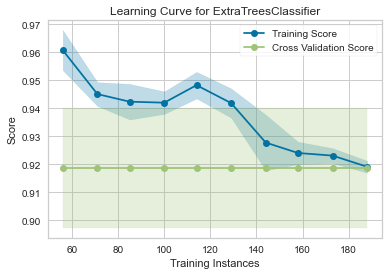

In [20]:
# 学習曲線
plot_model(tuned_et,plot='learning')

In [21]:
plot_model(tuned_et, plot='parameter')

Parameters
bootstrap                      True
ccp_alpha                       0.0
class_weight                     {}
criterion                   entropy
max_depth                        11
max_features                    1.0
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease           0.5
min_impurity_split             None
min_samples_leaf                  4
min_samples_split                10
min_weight_fraction_leaf        0.0
n_estimators                    170
n_jobs                           -1
oob_score                     False
random_state                    123
verbose                           0
warm_start                    False

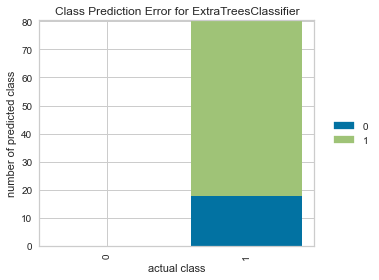

In [22]:
# Validation Curve
plot_model(tuned_et, plot='error') #save=True にすると png で保存可能

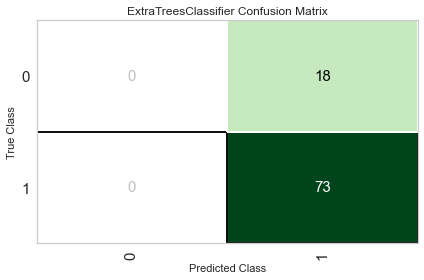

In [23]:
plot_model(tuned_et, plot='confusion_matrix')

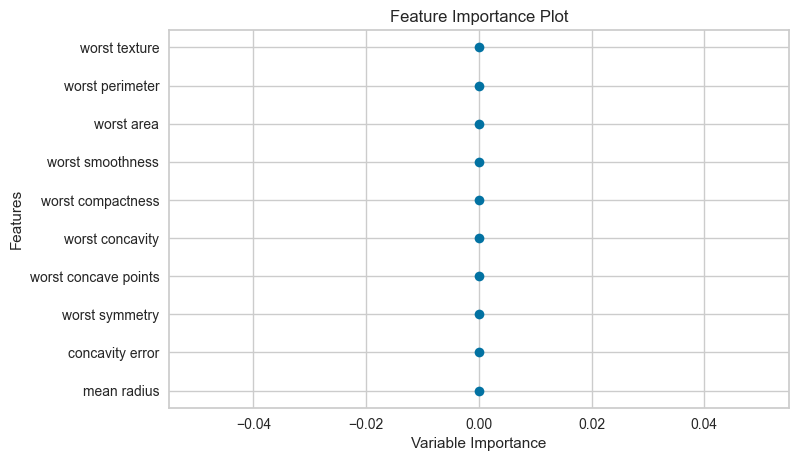

In [24]:
# Feature Importance
plot_model(tuned_et, plot='feature')

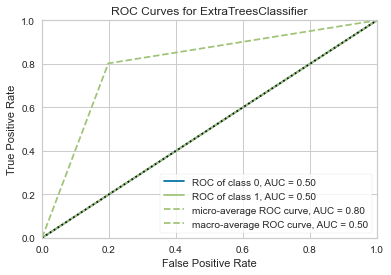

In [25]:
plot_model(tuned_et, plot='auc')

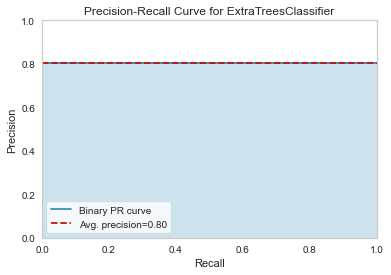

In [26]:
plot_model(tuned_et, plot='pr')

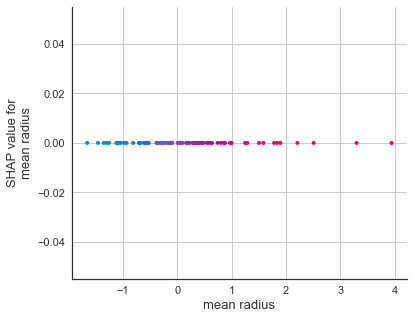

In [27]:
# SHAPによるモデルの解釈(dependence_plot)
interpret_model(tuned_et, plot = 'correlation')

#### Ramdom Forest の実行

In [28]:
# Random Forest Regressor を実行
rf = create_model('rf')

# Random Forest のハイパーパラメータの最適化
tuned_rf = tune_model(rf, n_iter = 100, optimize = 'auc')

In [29]:
# 結果の確認
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

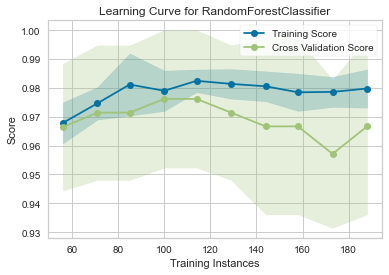

In [30]:
# 学習の精度
plot_model(estimator = tuned_rf, plot = 'learning')

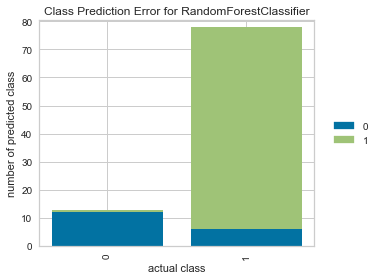

In [31]:
# Prediction Error Plot
plot_model(estimator = tuned_rf, plot = 'error')

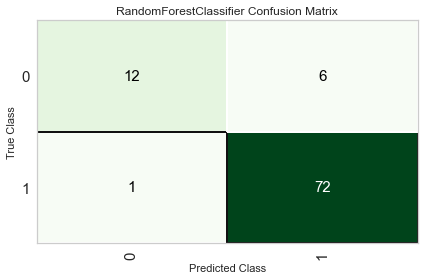

In [32]:
plot_model(estimator = tuned_rf, plot = 'confusion_matrix')

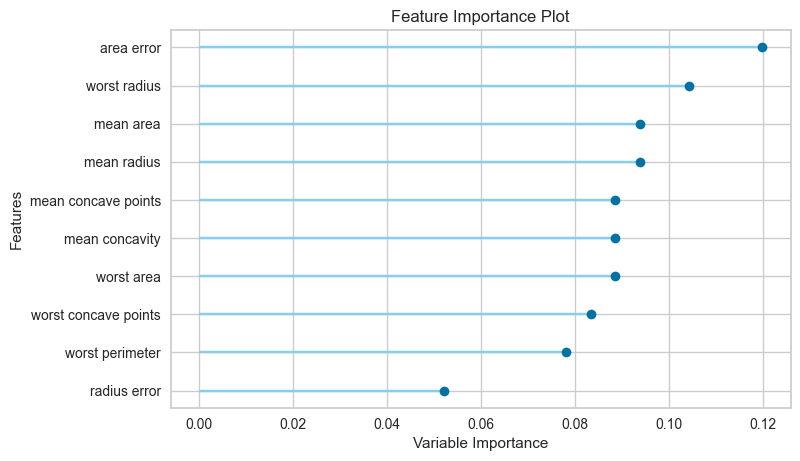

In [33]:
# Feature Importance
plot_model(estimator=tuned_rf, plot='feature')

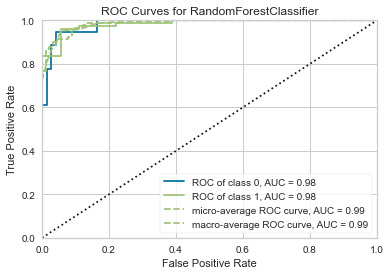

In [34]:
plot_model(tuned_rf, plot='auc')

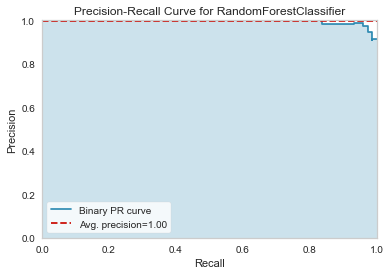

In [35]:
plot_model(tuned_rf, plot='pr')

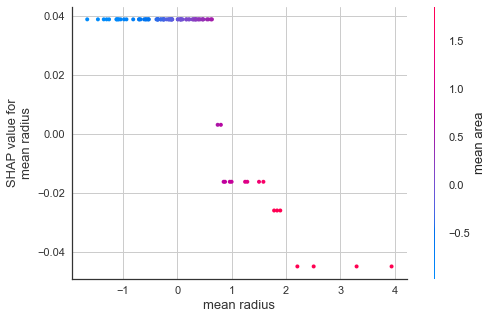

In [36]:
# SHAPによるモデルの解釈(dependence_plot)
interpret_model(tuned_rf, plot = 'correlation')

In [37]:
save_model(tuned_rf, '..//Data-science//model//rf_clf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced',
                                         criterion='entropy', max_depth=10,
                                         max_features='log2'

#### LightGBM の実行

In [38]:
# LightGBM を実行
lgbm = create_model('lightgbm')

# LightGBM のハイパーパラメータの最適化
tuned_lgbm = tune_model(lgbm, n_iter = 100, optimize = 'f1')

In [39]:
# 結果の確認
evaluate_model(tuned_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

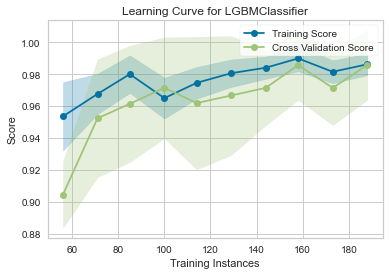

In [40]:
# 学習の精度
plot_model(estimator = tuned_lgbm, plot = 'learning')

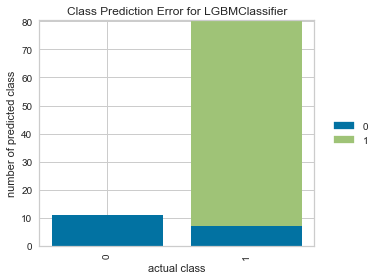

In [41]:
# Prediction Error Plot
plot_model(estimator = tuned_lgbm, plot = 'error')

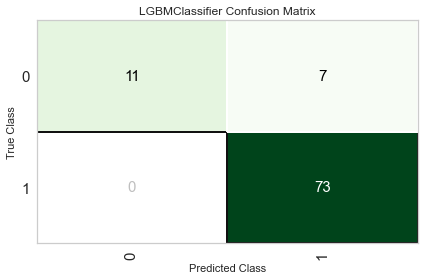

In [42]:
plot_model(estimator = tuned_lgbm, plot = 'confusion_matrix')

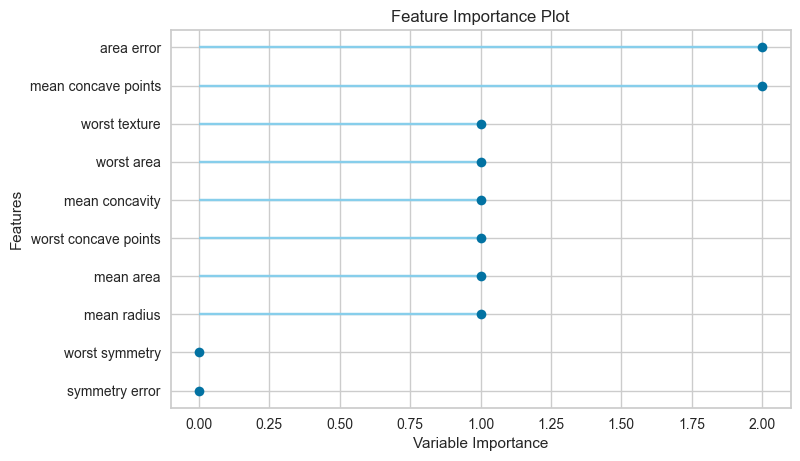

In [43]:
# Feature Importance
plot_model(estimator=tuned_lgbm, plot='feature')

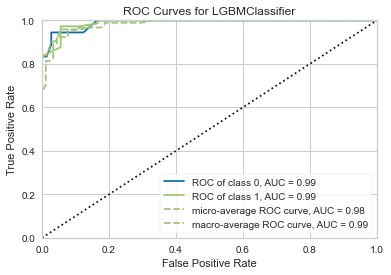

In [44]:
plot_model(estimator=tuned_lgbm, plot='auc')

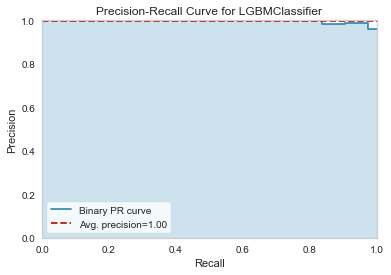

In [45]:
plot_model(estimator=tuned_lgbm, plot='pr')

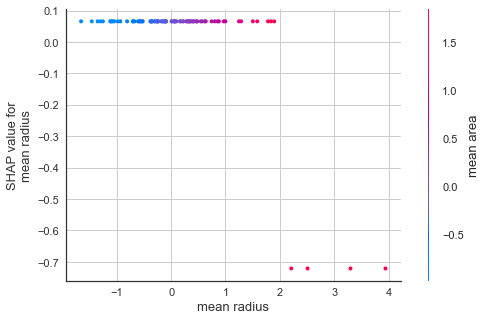

In [46]:
# SHAPによるモデルの解釈(dependence_plot)
interpret_model(tuned_lgbm, plot = 'correlation')

#### モデルのアンサンブル

アンサンブル，ブレンド，スタッキングが可能

In [47]:
ensemble = blend_models([tuned_et, tuned_rf, tuned_lgbm])

In [48]:
# スタッキング
gbc = create_model('gbc')

stacker = stack_models([tuned_et, tuned_rf, tuned_lgbm], meta_model=gbc)

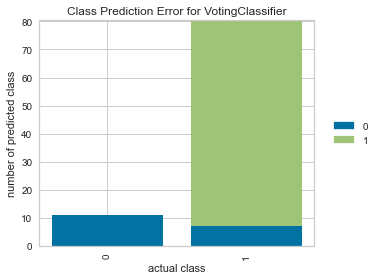

In [49]:
plot_model(ensemble, plot='error')

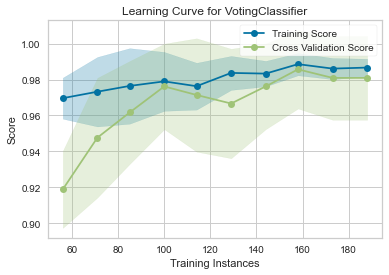

In [50]:
plot_model(ensemble, plot='learning')

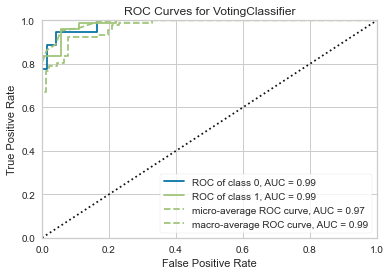

In [51]:
plot_model(ensemble, plot='auc')

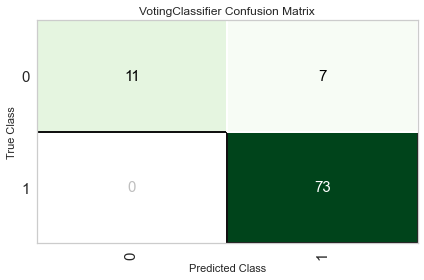

In [52]:
plot_model(ensemble, plot='confusion_matrix')

In [53]:
evaluate_model(ensemble)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## SHAPによるモデルの解釈

### SHAP（SHapley Additive exPlanations）とは
SHAPとは，shapley値を用いて，予測結果に対して特徴量がどのように寄与するかを可視化する方法．

shapley値とは限界貢献度の期待値（平均値）nokoto.
機械学習に当てはめる場合．予測した値に対して，それぞれの特徴量が予測にどのような影響を与えたかを算出した値と言える．

### method
TreeExplainer()は勾配ブースティング（XGBoost, LightGBM, CatBoostなど）で作成したモデルを読み込み、shapley値を導くためのインスタンス.

#### 引数
- model_output: モデルの出力方法．margin(生データのshape値)，probability(確率空間に変換されたshapley値)，log_loss()がある．


### メリット
- 計算方法が公開されており，貢献度が数値化されるため，完全な透明性が求められる場合に有効
- データ数が少ない場合でも結果が安定
- 計算時間が少ない

### デメリット
- 計算できるアルゴリズムが限定的
- アンサンブルしたモデルには使用できない

In [70]:
# jupyter notebookにコードを表示させるためにjsをロード
shap.initjs()

explainer_rf = shap.TreeExplainer(model=tuned_rf, model_output='margin')

In [71]:
# shapley値の計算
shap_values_rf = explainer_rf.shap_values(X=X)

### Extra Tree について

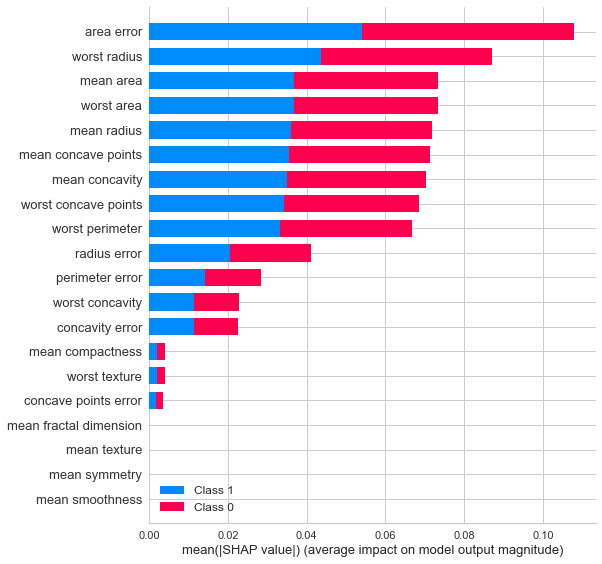

In [72]:
# etの特徴量の重要度
shap.initjs()
shap.summary_plot(shap_values_rf, X, plot_type="bar")

In [79]:
# etのforce_plot(shapley値と特徴変数の寄与度)
shap.initjs()
shap.force_plot(explainer_rf.expected_value[1], shap_values_et[1][0:100,:], X.iloc[0:100,:],link="logit")

In [80]:
# etのforce_plot(shapley値と特徴変数の寄与度)
shap.initjs()
shap.force_plot(explainer_rf.expected_value[1], shap_values_et[1][0,:], X.iloc[0,:],link="logit")

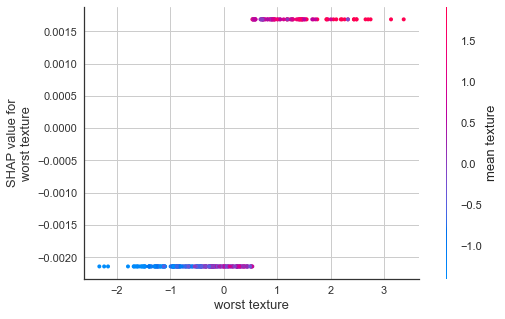

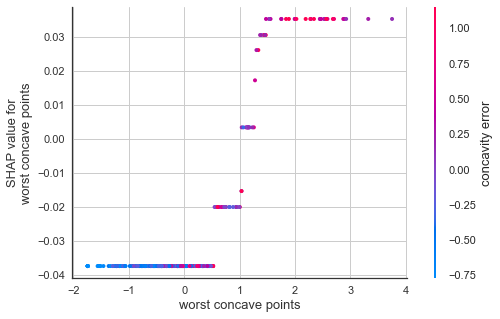

In [76]:
shap.dependence_plot('worst texture',shap_values_rf[0], X)

shap.dependence_plot('worst concave points',shap_values_rf[0], X)

#### モデルの確定

In [60]:
final = finalize_model(ensemble)
print(final)

VotingClassifier(estimators=[('et',
                              ExtraTreesClassifier(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   class_weight={},
                                                   criterion='entropy',
                                                   max_depth=11,
                                                   max_features=1.0,
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.5,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=4,
                                                   min_samples_split=10,
                                                   min_weight_fraction_leaf=0.0,
                                     

### モデルの評価，予測

In [61]:
pred_final = predict_model(final, test)

In [62]:
pred_final.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
362        13.71         18.68           88.73      571.0          0.09916   
201        11.71         15.45           75.03      420.3          0.11500   
103        15.27         12.91           98.17      725.5          0.08182   
292        14.80         17.66           95.88      674.8          0.09179   
300        13.38         30.72           86.34      557.2          0.09245   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
362           0.10700         0.05385              0.03783         0.1714   
201           0.07281         0.04006              0.03250         0.2009   
103           0.06230         0.05892              0.03157         0.1359   
292           0.08890         0.04069              0.02260         0.1893   
300           0.07426         0.02819              0.03264         0.1375   

     mean fractal dimension  ...  worst area  worst smoothness  \
362                 0.06843  ...       701.9            0.1425   
201                 0.06506  ...       516.4            0.1460   
103                 0.05526  ...       932.7            0.1222   
292                 0.05886  ...       829.5            0.1226   
300                 0.06016  ...       705.6            0.1172   

     worst compactness  worst concavity  worst concave points  worst symmetry  \
362             0.2566          0.19350               0.12840          0.2849   
201             0.1115          0.10870               0.07864          0.2765   
103             0.2186          0.29620               0.10350          0.2320   
292             0.1881          0.20600               0.08308          0.3600   
300             0.1421          0.07003               0.07763          0.2196   

     worst fractal dimension  target  Label   Score  
362                  0.09031       1      1  0.9136  
201                  0.07806       1      1  0.9237  
103                  0.07474       1      1  0.7846  
292                  0.07285       1      1  0.8496  
300                  0.07675       1      1  0.9165  

[5 rows x 33 columns]

In [64]:
from pycaret.utils import check_metric
check_metric(pred_final['target'], pred_final['Label'], metric = 'Recall')

1.0

In [65]:
check_metric(pred_final['target'], pred_final['Label'], metric = 'Precision')

0.9674

In [66]:
check_metric(pred_final['target'], pred_final['Label'], metric = 'AUC')

0.8636

In [68]:
check_metric(pred_final['target'], pred_final['Label'], metric = 'F1')

0.9834

In [69]:
check_metric(pred_final['target'], pred_final['Label'], metric = 'Accuracy')

0.97

In [ ]:
# モデルの保存

save_model(final, '..//Data-science//model//FinalModel_clf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                               learning_rate=0.5,
                                                               max_depth=-1,
                                                               min_child_samples=11,
                              